In [1]:
import time, os, math, numpy as np, pandas as pd, sklearn as sk, matplotlib as plt
# import sqlite3
from pandasql import sqldf
import seaborn as sns
pysqldf = lambda q: sqldf(q, globals())
np.random.seed(42)
from pandas import get_dummies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report, make_scorer, recall_score, mean_squared_error,precision_recall_curve, precision_score, auc
from sklearn.metrics import roc_auc_score as ras
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler, normalize
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('c:/Users/snooney/Desktop/DOJ Hackathon/final_df_combined.csv')

In [35]:
df[['METROPOLITAN COUNTIES','NONMETROPOLITAN COUNTIES']] = pd.get_dummies(df['Metropolitan/Nonmetropolitan'])

In [36]:
df_remove = ['Estimate_Households_Total',
'Estimate_Households_Total_Less than $10,000',
 'Estimate_Households_Total_$10,000 to $14,999',
 'Estimate_Households_Total_$15,000 to $24,999',
 'Estimate_Households_Total_$25,000 to $34,999',
 'Estimate_Households_Total_$35,000 to $49,999',
 'Estimate_Households_Total_$50,000 to $74,999',
 'Estimate_Households_Total_$75,000 to $99,999',
 'Estimate_Households_Total_$100,000 to $149,999',
 'Estimate_Households_Total_$150,000 to $199,999',
 'Estimate_Households_Total_$200,000 or more',
 'Total population_Male',
 'Total population_Female',
 'males per 100 females',
 'Percent_Total population_18 years and over',
 'Percent_Total population_18 years and over_Male',
 'Percent_Total population_18 years and over_Female',
 'Percent_Total population_65 years and over_Male',
 'Percent_Total population_65 years and over_Female',
 'Percent_RACE_Total population_One race_American Indian and Alaska Native',
 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Cherokee tribal grouping',
 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Chippewa tribal grouping',
 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Navajo tribal grouping',
 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Sioux tribal grouping',
 'Percent_RACE_Total population_One race_Asian',
 'Percent_RACE_Total population_One race_Asian_Asian Indian',
 'Percent_RACE_Total population_One race_Asian_Chinese',
 'Percent_RACE_Total population_One race_Asian_Filipino',
 'Percent_RACE_Total population_One race_Asian_Japanese',
 'Percent_RACE_Total population_One race_Asian_Korean',
 'Percent_RACE_Total population_One race_Asian_Vietnamese',
 'Percent_RACE_Total population_One race_Asian_Other Asian',
 'Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander',
 'Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Native Hawaiian',
 'Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Chamorro',
 'Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Samoan',
 'Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Other Pacific Islander',
 'Percent_RACE_Total population_One race_Some other race',
 'Percent_HISPANIC OR LATINO AND RACE_Total population_Hispanic or Latino (of any race)',
 'Unnamed: 0',
 'Metropolitan/Nonmetropolitan']

In [37]:

df['Percent_RACE_Total population_One race_American Indian and Alaska Native Total'] = df[['Percent_RACE_Total population_One race_American Indian and Alaska Native_Cherokee tribal grouping', 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Chippewa tribal grouping', 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Navajo tribal grouping', 'Percent_RACE_Total population_One race_American Indian and Alaska Native_Sioux tribal grouping']].sum(axis=1)
df['Percent_RACE_Total population_One race_Asian_Total'] = df[['Percent_RACE_Total population_One race_Asian_Asian Indian','Percent_RACE_Total population_One race_Asian_Chinese','Percent_RACE_Total population_One race_Asian_Filipino','Percent_RACE_Total population_One race_Asian_Japanese','Percent_RACE_Total population_One race_Asian_Korean','Percent_RACE_Total population_One race_Asian_Vietnamese','Percent_RACE_Total population_One race_Asian_Other Asian']].sum(axis=1)
df['Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Total'] = df[['Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Native Hawaiian','Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Chamorro','Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Samoan','Percent_RACE_Total population_One race_Native Hawaiian and Other Pacific Islander_Other Pacific Islander']].sum(axis=1)
df['Percent_RACE_Total population_Other_Hispanic'] = df[['Percent_RACE_Total population_One race_Some other race', 'Percent_HISPANIC OR LATINO AND RACE_Total population_Hispanic or Latino (of any race)']].sum(axis=1)

In [38]:
df.drop(columns=df_remove, inplace=True)

Feature Importance

In [39]:
# Fill missing values in each column with respective mode value
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
"""
# Ignore this Feature Importance Method
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Assuming you have X as features and y as labels
X = df.drop('HPSA Category', axis=1)  # all features excluding 'HPSA Category'
y = df['HPSA Category']  # target variable

# Create a Logistic Regression classifier
lr = LogisticRegression(max_iter=10000)

# Create RFECV object with custom step function for progress bar
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='f1')

# Fit RFECV
rfecv.fit(X, y)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the features sorted by importance
feature_importance = list(zip(X.columns, rfecv.estimator_.coef_[0]))
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

# Print the most important features
for feature, importance in feature_importance:
    print('Feature: {}, Importance: {}'.format(feature, importance))

# Keep only the most important features
X_important = rfecv.transform(X)
"""

"\n# Ignore this Feature Importance Method\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.model_selection import StratifiedKFold\n\n# Assuming you have X as features and y as labels\nX = df.drop('HPSA Category', axis=1)  # all features excluding 'HPSA Category'\ny = df['HPSA Category']  # target variable\n\n# Create a Logistic Regression classifier\nlr = LogisticRegression(max_iter=10000)\n\n# Create RFECV object with custom step function for progress bar\nrfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='f1')\n\n# Fit RFECV\nrfecv.fit(X, y)\n\n# Print the optimal number of features\nprint('Optimal number of features: {}'.format(rfecv.n_features_))\n\n# Get the features sorted by importance\nfeature_importance = list(zip(X.columns, rfecv.estimator_.coef_[0]))\nfeature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)\n\n# Print the most important features\nfor feature, importance 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Assuming X as features and y as labels
X = df.drop('HPSA Category', axis=1)  # all features excluding 'HPSA Category'
y = df['HPSA Category']  # target variable

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier with L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)

# Define hyperparameters for cross-validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a GridSearchCV object
grid = GridSearchCV(lr, param_grid, cv=10, scoring='f1')

# Fit the model and find the best parameters
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print('Best parameters: ', best_params)

# Fit the model with the best parameters
lr_best = LogisticRegression(penalty='l1', solver='liblinear', C=best_params['C'], max_iter=10000)
lr_best.fit(X_train, y_train)

# Predict and compute F1 score on the training data
y_train_pred = lr_best.predict(X_train)
f1_train = f1_score(y_train, y_train_pred)
print('Training F1 Score: ', f1_train)

# Predict and compute F1 score on the testing data
y_test_pred = lr_best.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)
print('Testing F1 Score: ', f1_test)


Best parameters:  {'C': 0.1}
Training F1 Score:  0.7269815852682144
Testing F1 Score:  0.710691823899371


Important features: Index(['CASTHMA', 'CHECKUP', 'COREM', 'COREW', 'DISABILITY', 'HEARING',
       'HIGHCHOL', 'INDEPLIVE', 'LPA', 'TEETHLOST', 'VISION',
       'tot_law_enforce_FTE', 'Estimate_Households_Mean income (dollars)',
       'Percent_Total population_Female',
       'Percent_Total population_0 to 34 years', 'Rape', 'Larceny-theft',
       'DrugOrAlc_Deaths_pct',
       'Percent_RACE_Total population_One race_Asian_Total'],
      dtype='object')


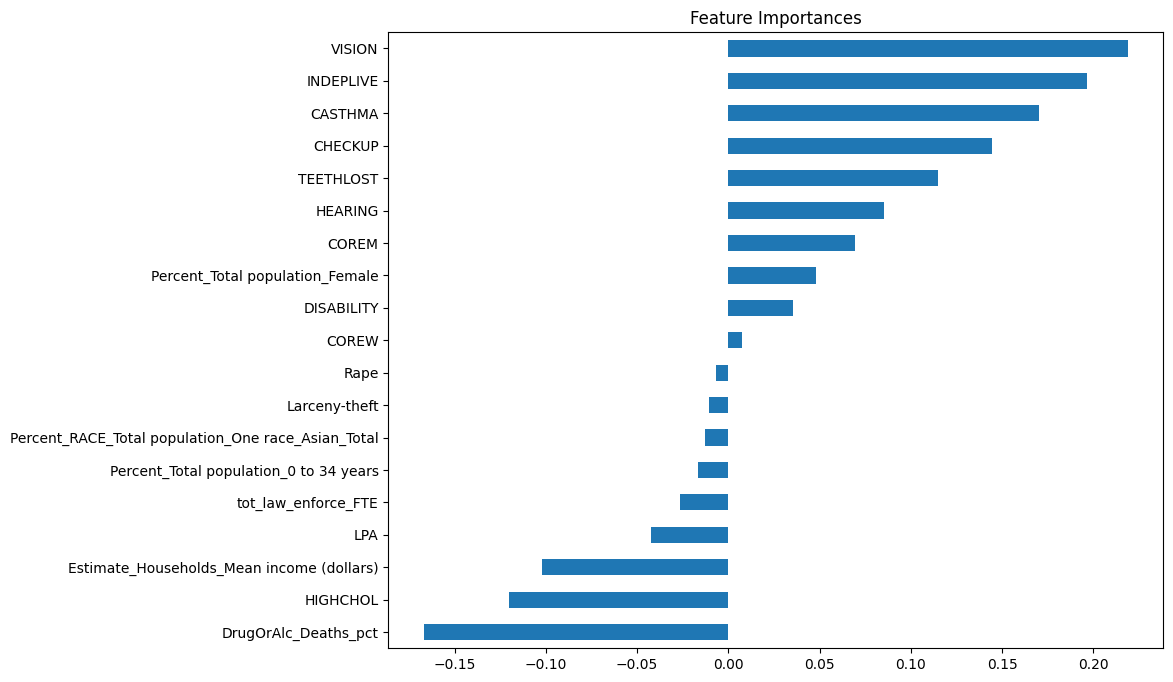

Training F1 Score:  0.7212851405622491
Testing F1 Score:  0.7210031347962383


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X as features and y as labels
X = df.drop(['HPSA Category','CountyFIPS','HPSA Score'], axis=1)  # all features excluding 'HPSA Category'
y = df['HPSA Category']  # target variable

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier with L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=10000)

# Fit the model
lr.fit(X_train, y_train)

# Get the coefficients
coef = lr.coef_[0]

# Create a mask for non-zero coefficients
important_features_mask = coef != 0

# Apply the mask to get the names of important features
important_features = X.columns[important_features_mask]

# Print the important features
print('Important features:', important_features)

# Create a dataframe for better visualization
df_importance = pd.DataFrame(coef[important_features_mask], columns=["Importance"], index=important_features)

# Plot the feature importance
plt.figure(figsize=(10, 8))
df_importance["Importance"].sort_values().plot(kind="barh")
plt.title('Feature Importances')
plt.show()

# Keep only the important features
X_important_train = X_train[:, important_features_mask]
X_important_test = X_test[:, important_features_mask]

# Fit the model with important features
lr.fit(X_important_train, y_train)

# Predict and compute F1 score on the training data
y_train_pred = lr.predict(X_important_train)
f1_train = f1_score(y_train, y_train_pred)
print('Training F1 Score: ', f1_train)

# Predict and compute F1 score on the testing data
y_test_pred = lr.predict(X_important_test)
f1_test = f1_score(y_test, y_test_pred)
print('Testing F1 Score: ', f1_test)

Important features: Index(['ACCESS2', 'ARTHRITIS', 'BINGE', 'BPHIGH', 'BPMED', 'CANCER', 'CASTHMA',
       'CERVICAL', 'CHD', 'CHECKUP', 'CHOLSCREEN', 'COGNITION', 'COLON_SCREEN',
       'COPD', 'COREM', 'COREW', 'CSMOKING', 'DENTAL', 'DEPRESSION',
       'DIABETES', 'DISABILITY', 'GHLTH', 'HEARING', 'HIGHCHOL', 'INDEPLIVE',
       'KIDNEY', 'LPA', 'MAMMOUSE', 'MHLTH', 'MOBILITY', 'OBESITY', 'PHLTH',
       'SELFCARE', 'SLEEP', 'STROKE', 'TEETHLOST', 'VISION',
       'tot_law_enforce_FTE', 'Estimate_Households_Median income (dollars)',
       'Estimate_Households_Mean income (dollars)', 'Total population',
       'Estimate_Total housing units', 'Percent_Total population_Male',
       'Percent_Total population_Female',
       'Percent_Total population_0 to 34 years',
       'Percent_Total population_35 to 64 years',
       'Percent_Total population_65 years and over',
       'Percent_RACE_Total population_One race',
       'Percent_RACE_Total population_Two or more races',
       'Perce

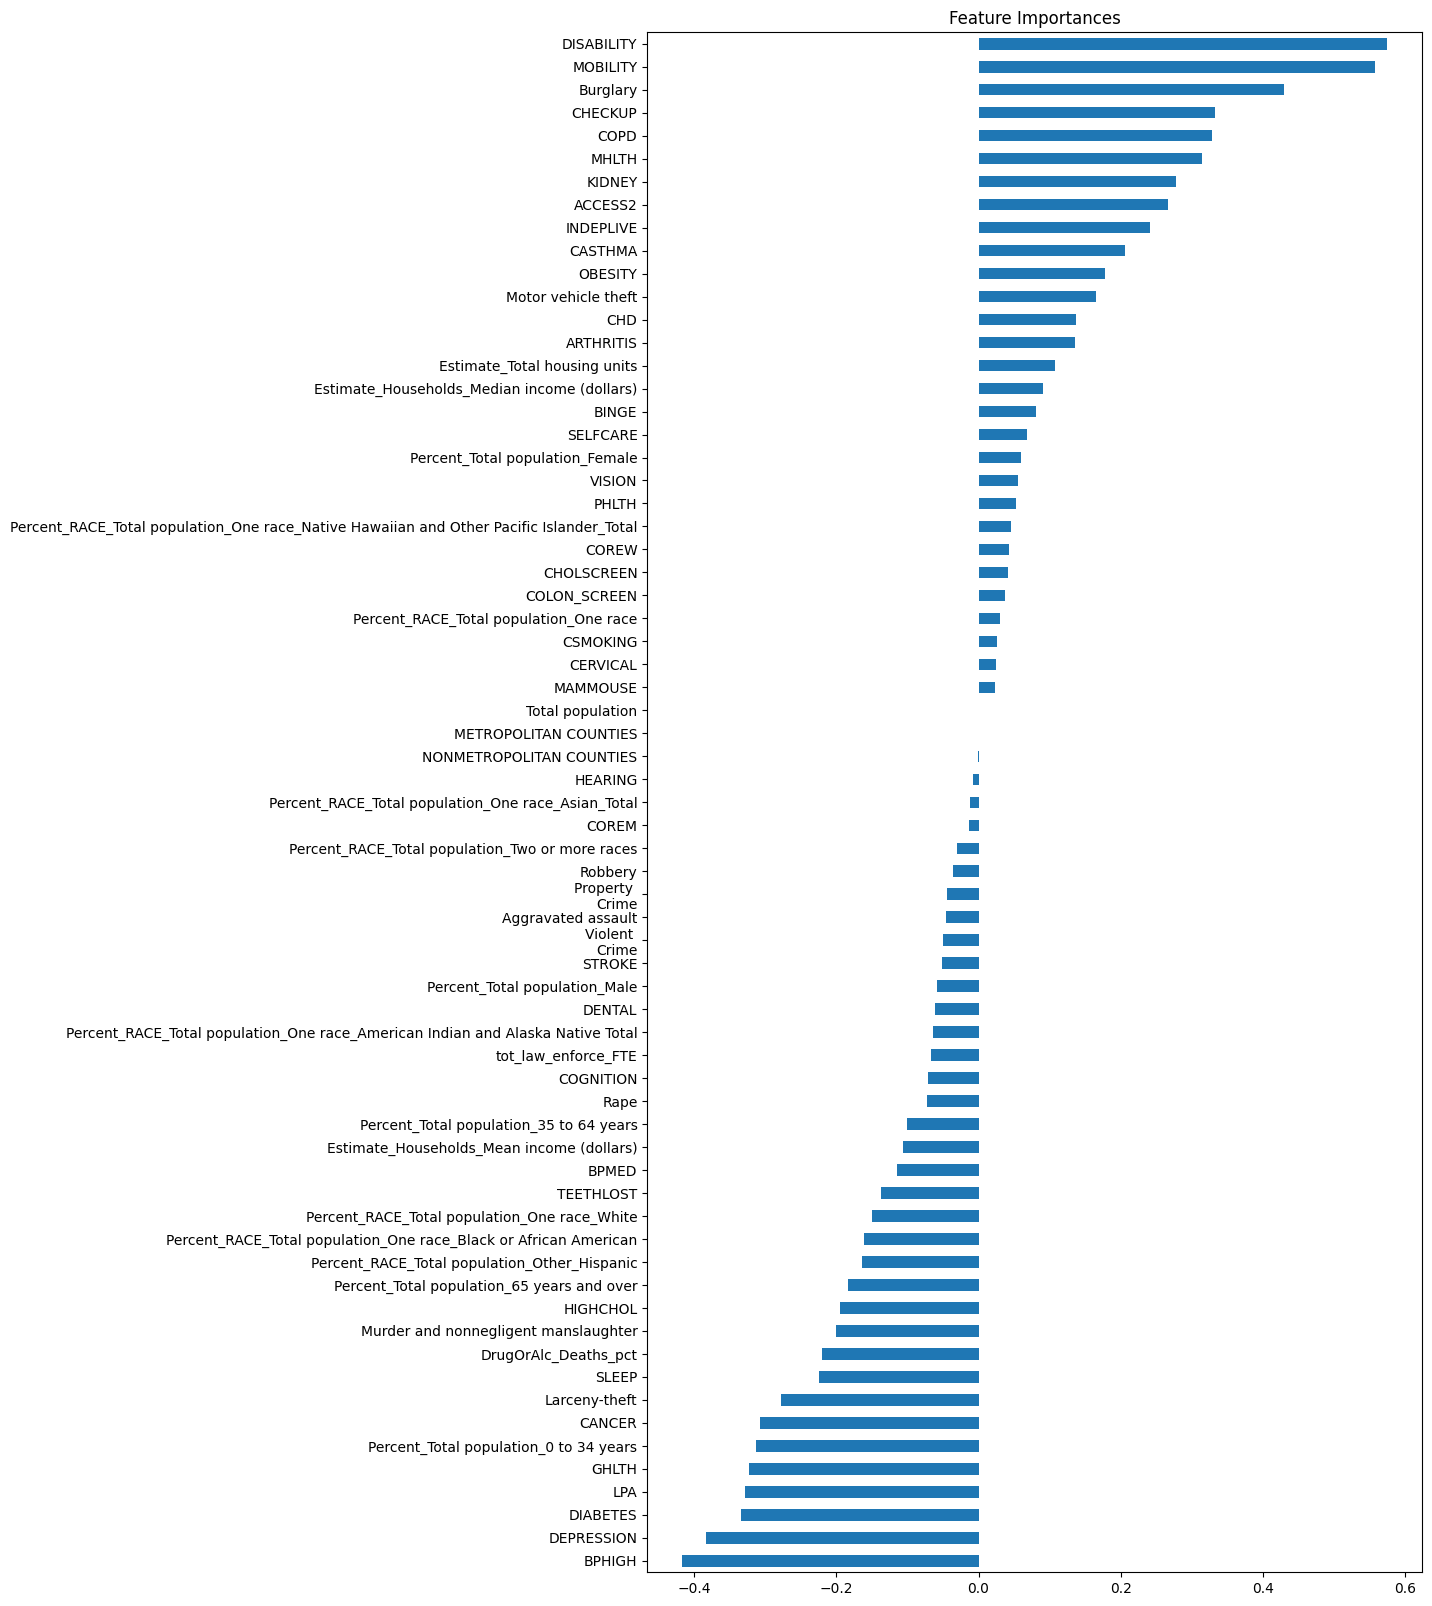

Training F1 Score:  0.7308319738988581
Testing F1 Score:  0.710691823899371


In [43]:
from sklearn.svm import SVC
# Assuming X as features and y as labels
X = df.drop(['HPSA Category','CountyFIPS','HPSA Score'], axis=1)  # all features excluding 'HPSA Category'
y = df['HPSA Category']  # target variable

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Create a SVC classifier
svc = SVC(kernel='linear', C=0.1)

# Fit the model
svc.fit(X_train, y_train)

# Get the coefficients
coef = svc.coef_[0]

# Create a mask for non-zero coefficients
important_features_mask = coef != 0

# Apply the mask to get the names of important features
important_features = X.columns[important_features_mask]

# Print the important features
print('Important features:', important_features)

# Create a dataframe for better visualization
df_importance = pd.DataFrame(coef[important_features_mask], columns=["Importance"], index=important_features)

# Plot the feature importance
plt.figure(figsize=(10, 20))  # increase the height to 20
df_importance["Importance"].sort_values().plot(kind="barh")
plt.title('Feature Importances')
plt.show()

# Keep only the important features
X_important_train = X_train[:, important_features_mask]
X_important_test = X_test[:, important_features_mask]

# Fit the model with important features
svc.fit(X_important_train, y_train)

# Predict and compute F1 score on the training data
y_train_pred = svc.predict(X_important_train)
f1_train = f1_score(y_train, y_train_pred)
print('Training F1 Score: ', f1_train)

# Predict and compute F1 score on the testing data
y_test_pred = svc.predict(X_important_test)
f1_test = f1_score(y_test, y_test_pred)
print('Testing F1 Score: ', f1_test)


In [16]:
# Calculate correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find pairs with correlation greater than a threshold (e.g., 0.8)
high_corr_pairs = [(column, row, upper[column][row]) for column in upper.columns for row in upper.index if upper[column][row] > 0.8]

print(high_corr_pairs)

[('CHD', 'ARTHRITIS', 0.8454382075708023), ('CHD', 'BPHIGH', 0.8339893492864483), ('COPD', 'BPHIGH', 0.8048630599968719), ('COPD', 'CHD', 0.8466826901214322), ('CSMOKING', 'COGNITION', 0.815162588357524), ('CSMOKING', 'COPD', 0.8522007510820805), ('DENTAL', 'COGNITION', 0.8656791074135591), ('DIABETES', 'BPHIGH', 0.8604330829521268), ('DISABILITY', 'COGNITION', 0.9029484874871626), ('DISABILITY', 'COPD', 0.8477611230393035), ('DISABILITY', 'CSMOKING', 0.8175261001479646), ('DISABILITY', 'DENTAL', 0.8404675795028391), ('DISABILITY', 'DIABETES', 0.8066458436628468), ('GHLTH', 'COGNITION', 0.9012616907115937), ('GHLTH', 'COPD', 0.8041864233681131), ('GHLTH', 'CSMOKING', 0.8030863926055384), ('GHLTH', 'DENTAL', 0.8931168142127458), ('GHLTH', 'DIABETES', 0.8732045339192839), ('GHLTH', 'DISABILITY', 0.9224371009192277), ('HEARING', 'CHD', 0.847644160767215), ('INDEPLIVE', 'COGNITION', 0.9362939714099405), ('INDEPLIVE', 'COPD', 0.8149988335244015), ('INDEPLIVE', 'CSMOKING', 0.8454415201322859

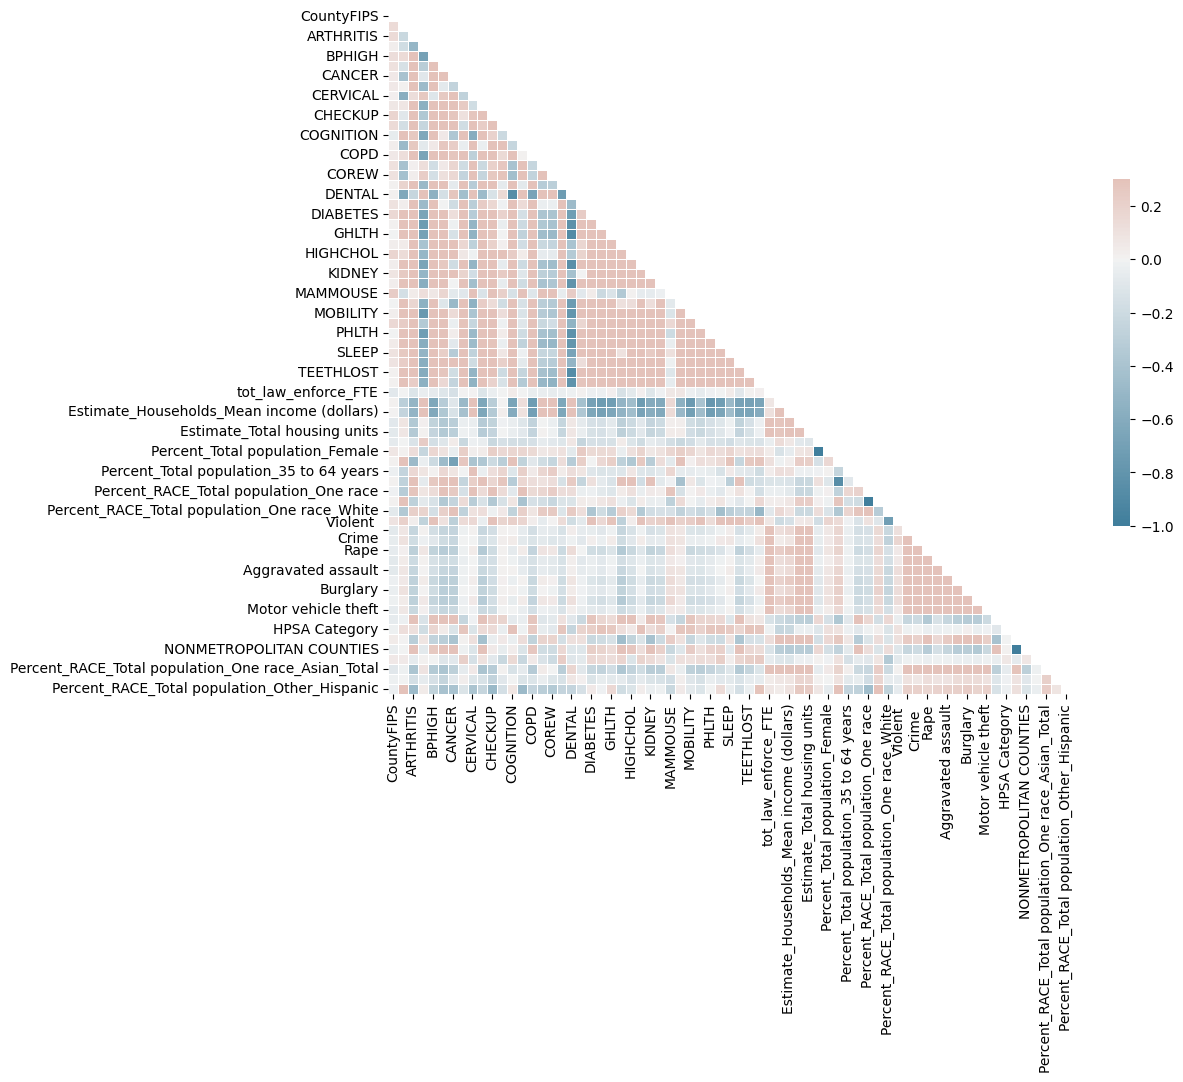

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [29]:
# Assuming df is your original dataframe

# Get predictions on entire data
predictions = svc.predict(scaler.transform(X))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Prediction'], index=df.index)

# Append predictions to the original dataframe
df_out = pd.concat([df, predictions_df], axis=1)


In [44]:
df_final = pd.concat([df[important_features], df['CountyFIPS'], df['HPSA Category'], df['HPSA Score'] ,df_out['Prediction']], axis=1)

In [46]:
df_final.to_csv('DOJ_final_predictions.csv', index=False)